<h1 style="font-family:verdana;"> <center>Brain Tumor Detection using CNN</center> </h1>

>**Project Description::** 
Our project aims to classify brain tumors using Convolutional Neural Networks (CNNs). This deep learning approach leverages CNN's ability to automatically and adaptively learn spatial hierarchies of features from input images. We will use a pre-labeled dataset of brain MRI scans to train our model. The dataset will include images categorized into different types of brain tumors, such as gliomas, meningiomas, and pituitary tumors, as well as healthy cases.



Literature Review:

I conducted an extensive review of recent research papers and articles focusing on brain tumor classification using MRI images. This literature review was aimed at understanding the current state-of-the-techniques, identifying challenges, and gaining insights into effective strategies for overcoming these challenges.

CNNs have become the cornerstone of image classification, including medical image analysis. Their ability to automatically and adaptively learn spatial hierarchies of features makes them highly effective for brain tumor classification. Studies have demonstrated that CNNs can achieve high accuracy in distinguishing between different types of brain tumors from MRI images. For instance, Khan et al. [1] (2020) proposed a deep learning. proposed a deep learning framework utilizing CNNs for brain tumor classification from MRI images. The authors incorporated data augmentation techniques to handle the variability in MRI images. The proposed CNN architecture included multiple convolutional layers followed by max-pooling layers and dense layers. The study achieved a high classification accuracy, demonstrating the effectiveness of CNNs in distinguishing between various types of brain tumors.

CNN Model is able to work with huge dataset and very customizable. For instance , Afshar and colleagues [2] introduced a CNN model with residual connections, helping to mitigate the vanishing gradient problem and allowing the model to train deeper networks effectively. The study utilized a large dataset of MRI images and demonstrated that their CNN architecture outperformed traditional CNN models in terms of accuracy and training efficiency. This work highlighted the advantages of incorporating advanced techniques such as residual learning into CNN architectures.

Furthermore, I investigated the application of transfer learning, which makes use of pre-trained models on sizable picture datasets to refine them using medical images [3] in order to enhance classification accuracy by utilizing prior knowledge.


Models and Datasets

We will employ a custom-designed CNN architecture to classify the MRI images accurately. The architecture will consist of multiple convolutional layers, pooling layers, and fully connected layers, ending with a softmax layer to output probabilities for each class.

The dataset for this project will be sourced from a publicly available repository on Kaggle, such as the "Brain Tumor Classification (MRI)" dataset. This dataset contains annotated MRI scans categorized into different tumor types and healthy controls.

 Data Visualization:
 
I displayed a few samples from the Brain Tumor Classification (MRI) dataset along with the number of samples for each type of tumor in each picture folder to help better understanding the dataset. The MRI pictures utilized in the project and the general appearance of the dataset are shown in the following examples:

Glioma Tumor:

Gliomas, accounting for 30% of all brain and central nervous system tumors, originate from the glial cells in the brain or spine. Most of them are cancerous, with symptoms that differ depending on where they're located, often causing seizures, cognitive impairments, or motor deficits.

Meningioma Tumor:

Meningiomas are tumors that develop slowly from the meninges surrounding the brain and spinal cord. Although they usually show no symptoms, they can result in seizures, cognitive decline, vision disturbances, or motor deficits based on where they are located.

Pituitary Tumor:

Mostly non-cancerous pituitary adenomas make up 10-25% of tumors in the pituitary gland. They might lead to hormonal disruptions, leading to a range of issues such as migraines, changes in vision, or hormonal problems.


# Importing Libraries

In [1]:
!pip install mplcyberpunk


In [2]:
# Standard library imports
import os  # Provides a way of using operating system dependent functionality like reading or writing to the file system

# Numerical and data manipulation libraries
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # Data analysis and manipulation library

# Plotting and visualization libraries
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
import mplcyberpunk  # Style package for matplotlib to create cyberpunk-themed plots
plt.style.use("cyberpunk")  # Set the plotting style to cyberpunk
import seaborn as sns  # Statistical data visualization library based on matplotlib

# Utility libraries
import time  # Time-related functions
import cv2  # OpenCV library for computer vision tasks
from tqdm import tqdm  # Progress bar library for loops

# TensorFlow and Keras for deep learning
import tensorflow as tf  # End-to-end open-source platform for machine learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and image data generation
from tensorflow.keras.models import Sequential  # Sequential model in Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input  # Layers for building neural networks
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training neural networks

# Scikit-learn for machine learning utilities
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score  # Function to compute accuracy
from sklearn.metrics import classification_report, confusion_matrix  # Metrics for classification evaluation

# Image handling libraries
import io  # Core tools for working with streams in Python
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving images

# Warnings handling
from warnings import filterwarnings  # Suppress warnings


2024-07-23 03:01:40.616304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 03:01:40.616428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 03:01:40.774854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Loading

In [3]:
# Initialize empty lists to store the training images and their corresponding labels
X_train = []
y_train = []

# Define the different categories of labels for the dataset
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Set the desired image size for resizing
image_size = 256

# Process images from the training dataset
for i in labels:
    # Construct the path to the folder containing images for the current label
    folderPath = os.path.join('../input/Training', i)
    # Iterate over each image file in the folder
    for j in tqdm(os.listdir(folderPath)):
        # Read the image from the file
        img = cv2.imread(os.path.join(folderPath, j))
        # Resize the image to the specified dimensions
        img = cv2.resize(img, (image_size, image_size))
        # Append the resized image to the training data list
        X_train.append(img)
        # Append the corresponding label to the label list
        y_train.append(i)

# Process images from the testing dataset
for i in labels:
    # Construct the path to the folder containing images for the current label
    folderPath = os.path.join('../input/Testing', i)
    # Iterate over each image file in the folder
    for j in tqdm(os.listdir(folderPath)):
        # Read the image from the file
        img = cv2.imread(os.path.join(folderPath, j))
        # Resize the image to the specified dimensions
        img = cv2.resize(img, (image_size, image_size))
        # Append the resized image to the training data list (combining training and testing data)
        X_train.append(img)
        # Append the corresponding label to the label list
        y_train.append(i)

# Convert the lists of images and labels to numpy arrays for efficient processing
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 74/74 [00:00<00:00, 123.16it/s]


# Visualizatioin

**Glioma Tumor:** 
>Originating in the brain or spine's glial cells, gliomas represent 30% of all brain and central nervous system tumors. They are mostly malignant, with symptoms that vary depending on location, frequently resulting in seizures, cognitive impairments, or motor deficits.

**Meningioma Tumor:**
>Meningiomas, arising from the meninges enveloping the brain and spinal cord, are slow-growing tumors. While they typically are asymptomatic, they can cause seizures, cognitive decline, vision disturbances, or motor deficits depending on their location.

**Pituitary Tumor:**
>Pituitary adenomas, mostly benign, occur in the pituitary gland, accounting for 10-25% of intracranial neoplasms. They may cause hormonal imbalances, resulting in a variety of symptoms including headaches, vision changes, or hormonal dysfunctions.


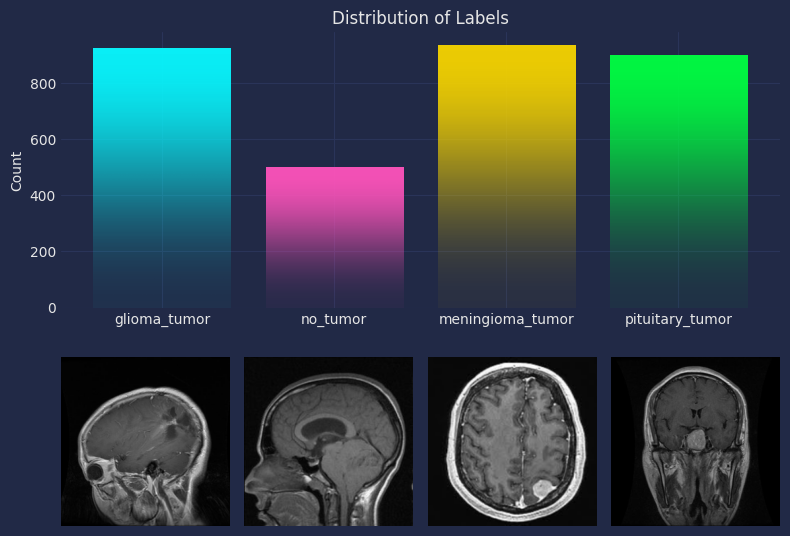

In [4]:
# Calculate the bar plot for each label
# Create a dictionary to store the count of each label in the y_train array
label_counts = {label: np.sum(y_train == label) for label in labels}

# Create a figure for the plots with a specified size
plt.figure(figsize=(8, 6))

# Define colors for the bars in the bar plot
colors = ["C0", "C1", "C2", "C3"]

# Plot the bar plot (histogram) showing the distribution of labels
plt.subplot(2, 1, 1)  # Create a subplot (2 rows, 1 column, 1st subplot)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)  # Plot the bars with the specified colors
mplcyberpunk.add_bar_gradient(bars=bars)  # Add a gradient effect to the bars using mplcyberpunk
plt.ylabel('Count')  # Set the y-axis label
plt.title('Distribution of Labels')  # Set the plot title

# Initialize a counter for subplot indexing
k = 0

# Loop through each label to plot sample images
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:  # Check if the current label matches the desired label
            plt.subplot(2, 4, k + 5)  # Create a subplot (2 rows, 4 columns, subplot index)
            plt.imshow(X_train[j])  # Display the image corresponding to the current label
            plt.axis('off')  # Turn off the axis for the image subplot
            k += 1  # Increment the subplot index
            break  # Exit the while loop once an image for the current label is found
        j += 1  # Increment the image index

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the combined bar plot and sample images
plt.show()


# Data augmentation

📌 **Data augmentation** is an important technique in deep learning for increasing and diversifying existing datasets. Instead of collecting new data, it involves transforming existing data to generate variations. This approach addresses the need for large and diverse datasets, which are required to train robust deep learning models. By augmenting the data, we can effectively increase dataset sizes and diversity, thereby improving the model's ability to generalize to different scenarios.


Overly extreme augmentation parameters can distort images, limiting the model's ability to generalize. For example, excessive rotation or zooming can obscure important image features, resulting in misclassifications.

In [5]:
# Create an instance of ImageDataGenerator with data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
    zoom_range=0.1,          # Randomly zoom in/out by up to 10%
    horizontal_flip=False,   # Do not randomly flip images horizontally
    vertical_flip=False,     # Do not randomly flip images vertically
    fill_mode='nearest'      # Fill in new pixels with the nearest pixel values
)

# Fit the data generator to your training data
# This calculates any statistics required for feature-wise normalization
datagen.fit(X_train)

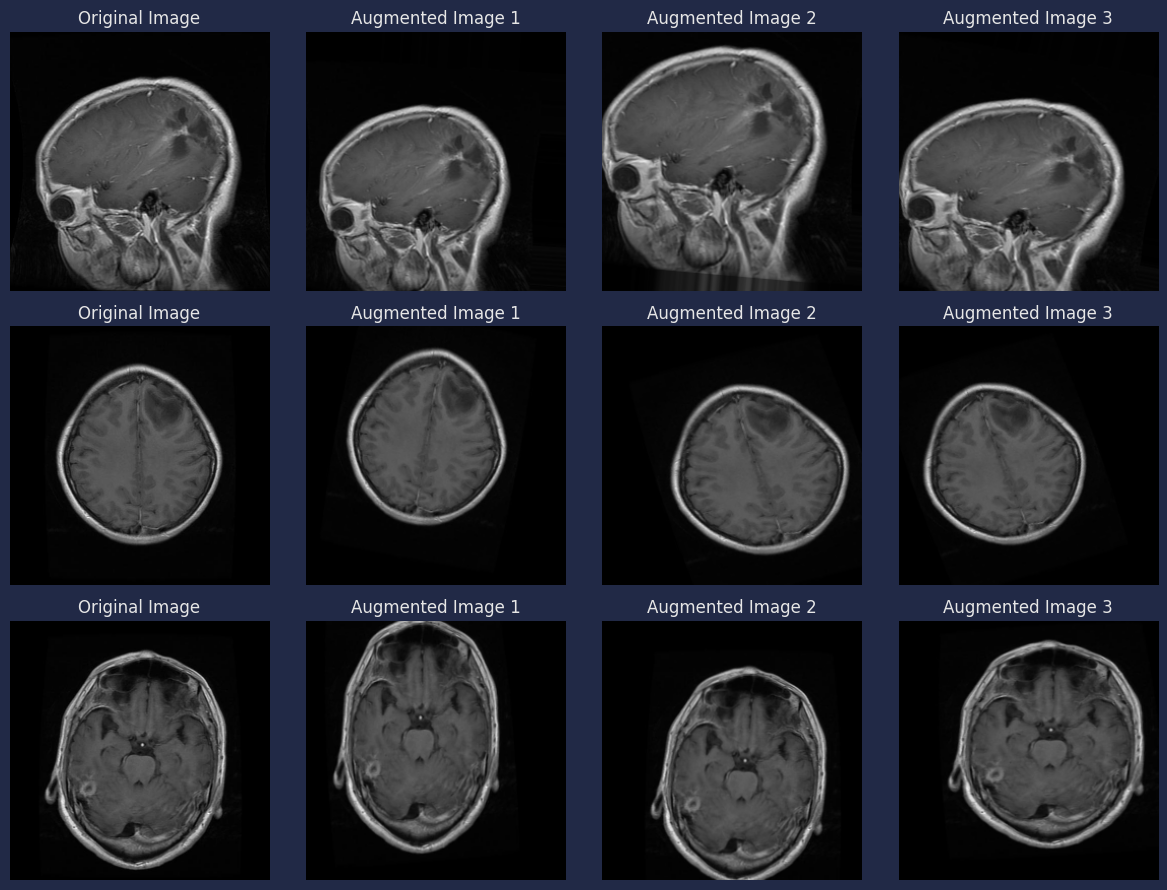

In [6]:
def visualize_augmented_images(image_generator, num_samples, num_augmented_images):
    # Create a list to store the original and augmented images
    augmented_images = []
    
    # Loop over the first `num_samples` images from the training set
    for sample in X_train[:num_samples]:
        
        # Create a list to store augmented versions of the current sample
        augmented_samples = [sample]
        
        # Generate `num_augmented_images` augmented versions of the sample
        for _ in range(num_augmented_images):
            augmented_samples.append(image_generator.random_transform(sample))
        
        # Add the list of augmented samples to the main list
        augmented_images.append(augmented_samples)

    # Create a figure for plotting
    fig, axes = plt.subplots(num_samples, num_augmented_images + 1, figsize=(12, num_samples * 3))
    
    # Loop over each sample and its augmented versions
    for i, sample in enumerate(augmented_images):
        for j, image in enumerate(sample):
            # Display the image in the corresponding subplot
            axes[i, j].imshow(image)
            
            # Set the title for the original and augmented images
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i, j].set_title(f'Augmented Image {j}')
            
            # Turn off the axis for the current subplot
            axes[i, j].axis('off')
            
    # Adjust layout to prevent overlapping elements
    plt.tight_layout()
    
    # Display the figure with the original and augmented images
    plt.show()

# Visualize augmented images to see how it works
visualize_augmented_images(datagen, num_samples=3, num_augmented_images=3)


# Data Preperation

In [7]:
# Convert y_train labels to one-hot encoded format using pandas
# pd.get_dummies() converts categorical labels into a one-hot encoded format
# np.array() converts the resulting DataFrame into a numpy array
y_train = np.array(pd.get_dummies(y_train))


In [8]:
# Split the dataset into training and testing sets
# The test set will be 10% of the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Further split the training set into training and validation sets
# The validation set will be 10% of the remaining dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}\n'
      f'y_train shape: {y_train.shape}\n'
      f'X_test shape: {X_test.shape}\n'
      f'y_test shape: {y_test.shape}\n'
      f'X_valid shape: {X_valid.shape}\n'
      f'y_valid shape: {y_valid.shape}')


X_train shape: (2643, 256, 256, 3)
y_train shape: (2643, 4)
X_train shape: (327, 256, 256, 3)
y_train shape: (327, 4)
y_train shape: (294, 256, 256, 3)
X_train shape: (294, 4)


# Normalization

Scaling pixel values to the range [0, 1] is an important preprocessing step. It stabilizes training while improving model convergence and generalization. 

In [9]:
# Normalize pixel values of training images to the range [0,1]
# This step scales the pixel values from the original range [0, 255] to the range [0, 1]
# Normalization helps in faster convergence during training of the neural network
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

# Print the maximum and minimum pixel values after normalization to verify the operation
print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")


Maximum and Minimum pixel value after normalization: 1.0 - 0.0


# Introduction to Convolution Neural Network

Convolutional Neural Networks (CNNs) are important in Deep Learning, particularly for Computer Vision, as they allow machines to understand and analyze visual data such as images. Neural Networks excel across a wide range of datasets in Machine Learning, including images, audio, and text. CNNs are especially useful for tasks such as image classification.


In a typical Neural Network architecture, we encounter three key layers:

1. **Input Layer**: This initial layer acts as a gateway for model input. Its neuron count corresponds to the dataset's total features, such as the number of pixels in images.

2. **Hidden Layer**: Data moves from the input layer to the hidden layers, where complex transformations take place. These layers can vary in number and neuron count, allowing the network to capture complex patterns using matrix operations, weight adjustments, biases, and activation functions.

3. **Output Layer**: The output layer receives processed data from the hidden layers and uses functions such as sigmoid or softmax to calculate probability scores for various classes.



<span style="color:crimson;">Feedforward</span> is the process of feeding data into a neural network model and then sequentially calculating the output from each layer until the final output layer. This step involves applying transformations and activation functions to the input data as it passes through the network.


<span style="color:crimson;">Backpropagation</span>, on the other hand, is the process of changing the model's parameters (weights and biases) by computing the gradients of the loss function with respect to each parameter. These gradients are calculated using the chain rule of calculus and used to adjust the parameters in a way that reduces the loss function. This iterative process enables the model to learn from its mistakes and improves its performance over time.

<p>&nbsp;</p>

In a Convolutional Neural Network, various layers work to process input data, such as images. The Convolutional layer extracts features using filters, the Pooling layer reduces image size to improve efficiency, and the fully connected layer makes predictions. Backpropagation and gradient descent are used by the network to refine its filter parameters and improve its performance.




# Model with Data Augmentation

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Initialize a Sequential model
model = Sequential()

# Add an input layer specifying the input shape (256x256 RGB images)
model.add(Input(shape=(256, 256, 3)))

# Add a convolutional layer with 16 filters, kernel size 5x5, 'same' padding, ReLU activation, and L2 regularization
model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
# Add batch normalization to normalize the activations of the previous layer
model.add(BatchNormalization())
# Add a max-pooling layer to reduce the spatial dimensions of the output volume
model.add(MaxPooling2D())
# Add dropout for regularization (preventing overfitting)
model.add(Dropout(0.2))

# Repeat the above steps for additional convolutional layers with increasing filter sizes
model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# Flatten the output volume to prepare it for the fully connected layers
model.add(Flatten())

# Add a fully connected (dense) layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))
# Add dropout for regularization
model.add(Dropout(0.5))
# Add the output layer with 4 units (one for each class) and softmax activation for multi-class classification
model.add(Dense(4, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,497,252 (32.41 MB)

 Trainable params: 8,496,772 (32.41 MB)

 Non-trainable params: 480 (1.88 KB)

In [11]:
pip install visualkeras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 17.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpy3m2hhtq.PNG'


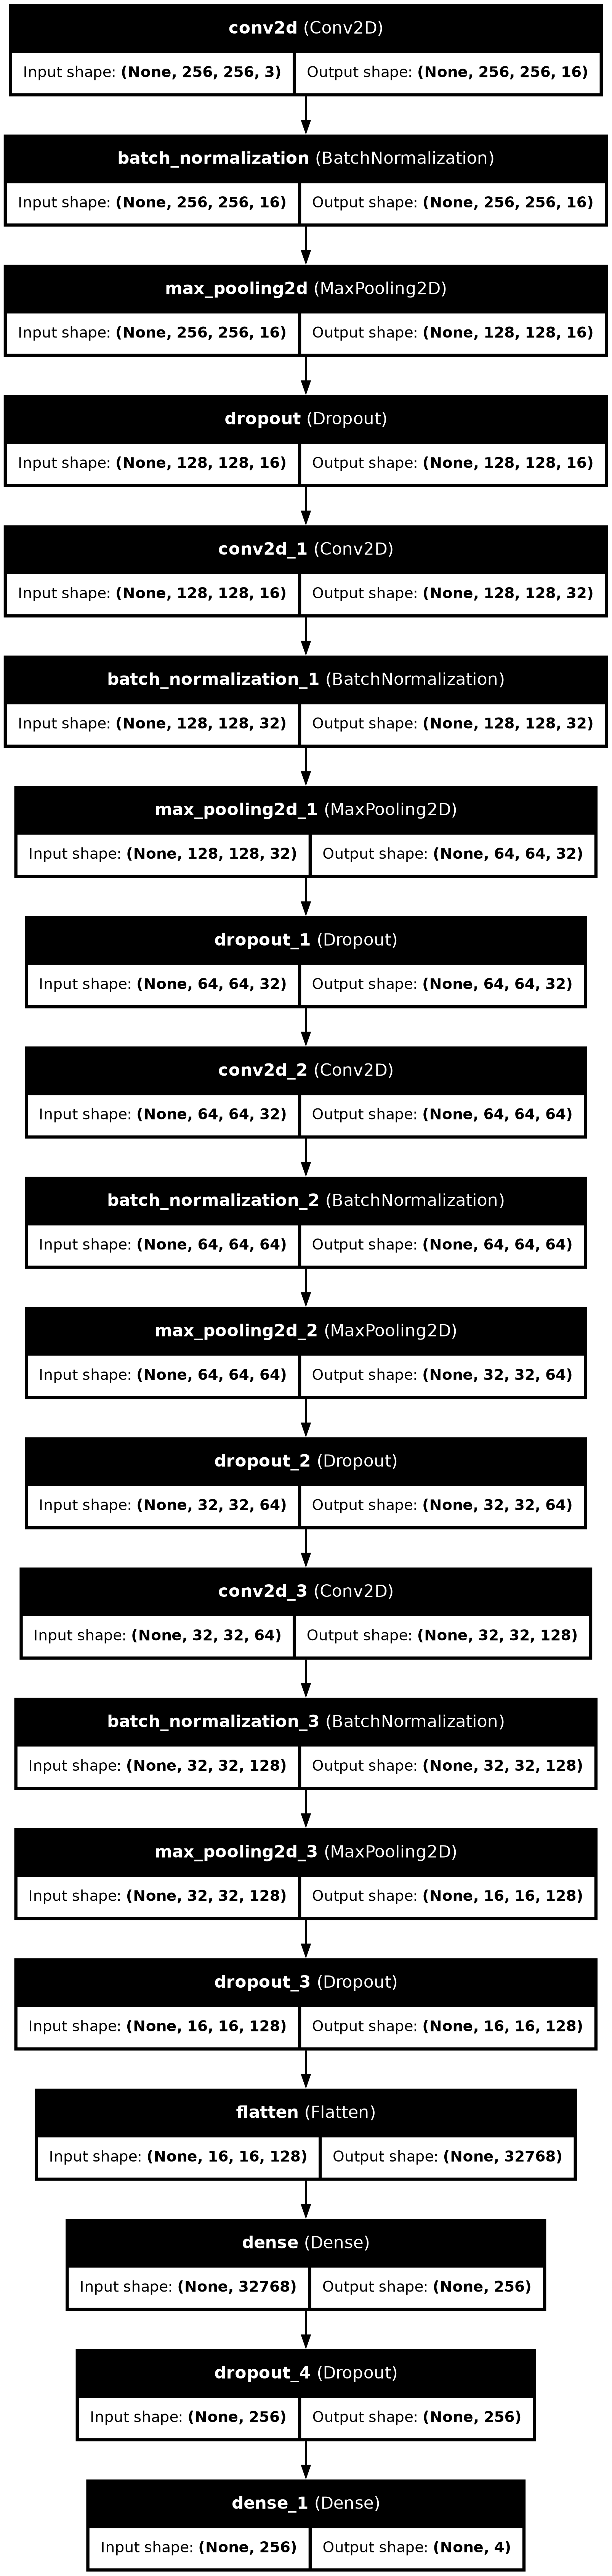

In [12]:
import visualkeras
from tensorflow.keras.utils import plot_model

# Plot the model using visualkeras
visualkeras.layered_view(model, to_file='model.png').show()

# Optionally, you can also use plot_model from tensorflow.keras.utils
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
# Record the start time before training begins
start_time = time.time()

# Train the model using the data generator for data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # Use the data generator to provide augmented data batches
    validation_data=(X_valid, y_valid),  # Validation data to evaluate the model during training
    epochs=20,  # Number of epochs (complete passes through the training data)
    verbose=1  # Verbosity mode (1 = progress bar)
)

# Record the end time after training ends
end_time = time.time()

# Calculate the total runtime for training
runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/42 ━━━━━━━━━━━━━━━━━━━━ 23:44 35s/step - accuracy: 0.1406 - loss: 4.5291

I0000 00:00:1721703790.485920     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721703790.511743     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/42 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3065 - loss: 11.1917  

W0000 00:00:1721703831.070884     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.3369 - loss: 8.9488 - val_accuracy: 0.1973 - val_loss: 21.5040
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 691ms/step - accuracy: 0.4622 - loss: 1.3998 - val_accuracy: 0.1871 - val_loss: 11.5803
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 703ms/step - accuracy: 0.4749 - loss: 1.3330 - val_accuracy: 0.1803 - val_loss: 11.8232
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 689ms/step - accuracy: 0.4979 - loss: 1.2854 - val_accuracy: 0.1803 - val_loss: 15.2526
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 688ms/step - accuracy: 0.5225 - loss: 1.2254 - val_accuracy: 0.3435 - val_loss: 10.1687
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 688ms/step - accuracy: 0.5373 - loss: 1.1757 - val_accuracy: 0.3435 - val_loss: 11.0386
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 688ms/step - accuracy: 0.5565 - loss: 1.1786 - val_accuracy: 0.1871 - val_loss: 9.6492
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 691ms/step - accuracy: 0.5795 - loss: 1.0807 - val_accuracy: 0.

# Confusion Matrix

A confusion matrix is a powerful and insightful tool for evaluating the performance of a classification model. It allows us to see not only the number of correct and incorrect predictions but also the types of errors the model is making. This matrix provides a more nuanced understanding of model performance compared to overall accuracy.

A confusion matrix is a square matrix used for evaluating the performance of a classification model. For a binary classification problem, the confusion matrix is a 2x2 matrix, but it can be extended to 𝑛×𝑛 for multi-class classification problems. Here’s a typical layout for a binary classifier:



Terms Explained

True Positive (TP): The number of times the model correctly predicted the positive class.

True Negative (TN): The number of times the model correctly predicted the negative class.

False Positive (FP): The number of times the model incorrectly predicted the positive class (Type I error).

False Negative (FN): The number of times the model incorrectly predicted the negative class (Type II error).

I used the confusion matrix to obtain insights, specifically to pinpoint inaccuracies in predictions for both known and unknown data. The confusion matrix is a valuable tool as it allows for a detailed analysis of the model's predictions in various categories, pinpointing where errors in classification are occurring.

 In a confusion matrix, the diagonal elements represent true positives, or instances that were correctly classified for each class. Off-diagonal elements denote misclassifications, with each element (i, j) representing instances of class i predicted to be class j. As a result, the sum of values in each row (except the diagonal) indicates false negatives, whereas the sum in each column (excluding the diagonal) indicates false positives.


I visualized the confusion matrix to gain insights, particularly in identifying areas where predictions are incorrect for both visible and unseen data. The confusion matrix is an effective tool because it provides a clear breakdown of the model's predictions across different classes and highlights areas where misclassification occurs.
<p>&nbsp;</p>

📚 In a confusion matrix, the **diagonal elements** represent **true positives**, or instances that were correctly classified for each class. **Off-diagonal elements** denote **misclassifications**, with each element (i, j) representing instances of class i predicted to be class j. As a result, the sum of values in each row (except the diagonal) indicates false negatives, whereas the sum in each column (excluding the diagonal) indicates false positives.

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


W0000 00:00:1721704514.593546     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


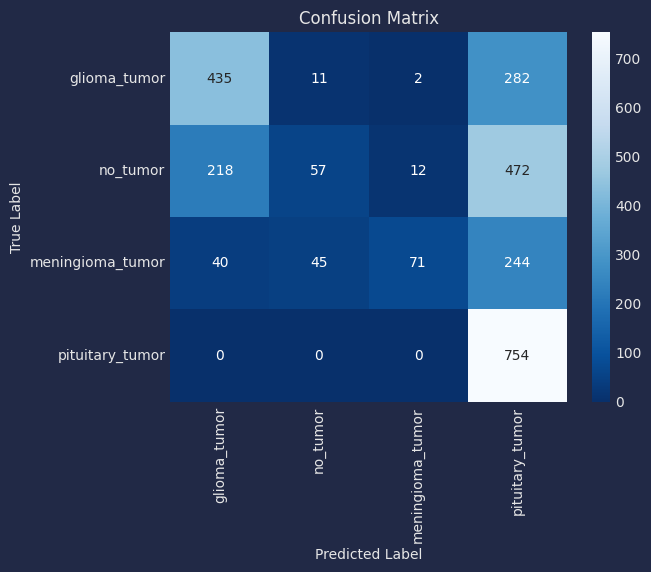

In [14]:
# Convert one-hot encoded labels back to their original class labels for the training data
y_true = np.argmax(y_train, axis=1)

# Predict the class labels for the training data using the trained model
y_pred = np.argmax(model.predict(X_train), axis=1)

# Create a confusion matrix to compare the true labels and the predicted labels
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot a heatmap of the confusion matrix using seaborn
heatmap = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

# Set the title and labels for the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the heatmap
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step


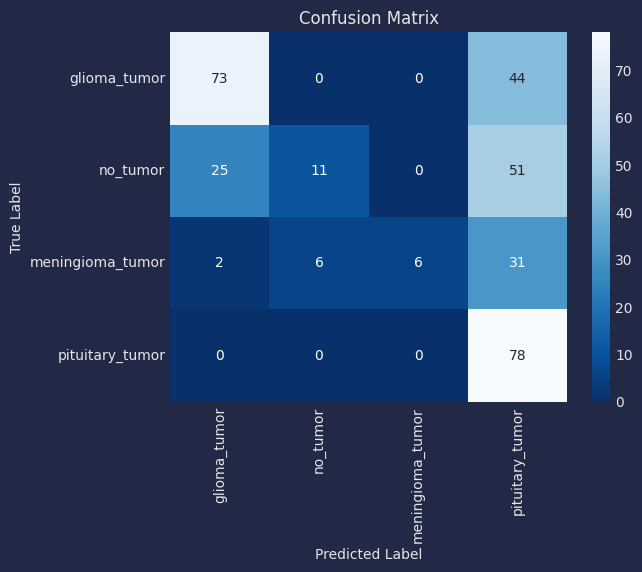

In [15]:
# Convert one-hot encoded test labels back to their original class labels and its confusion matrix for testing data
y_true_test = np.argmax(y_test, axis=1)

# Predict the class labels for the test data using the trained model
y_pred_test = np.argmax(model.predict(X_test), axis=1)

# Create a confusion matrix to compare the true labels and the predicted labels for the test data
confusion_mtx_test = confusion_matrix(y_true_test, y_pred_test)

# Plot a heatmap of the confusion matrix using seaborn
heatmap = sns.heatmap(confusion_mtx_test, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

# Set the title and labels for the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the heatmap
plt.show()


# Evaluation/Key Observations


High Accuracy for Pituitary Tumor:

The model performs exceptionally well in identifying pituitary tumors, with 754 correct classifications and no misclassifications.

Confusion Between Glioma Tumor and Pituitary Tumor:

A significant number of glioma tumor instances (282) are misclassified as pituitary tumors. This indicates the model might be struggling to distinguish between these two classes.

High Misclassification for No Tumor:

The no tumor class has high misclassification rates, with many instances being predicted as glioma tumor (218) and pituitary tumor (472). This indicates that the model is not performing well for this class, likely due to similarities in features between the classes or imbalanced data.

Moderate Performance for Meningioma Tumor:

The meningioma tumor class shows a moderate performance, with a significant number of instances misclassified as other tumors.

Classification Report :

Here's an explanation of each metric in the classification report:
Precision: Determines the accuracy of positive predictions by indicating how many of the predicted positive instances are actually positive.

Recall: This metric measures the model's ability to correctly identify all relevant instances, indicating how many actual positive instances were correctly predicted.

F1-score: Represents the harmonic mean of precision and recall, providing a balance between the two, which is especially useful when classes are imbalanced.

Accuracy: Indicates the overall correctness of the model's predictions by displaying the proportion of correctly predicted instances to the total number of instances.

The confusion matrix presented in this report evaluates the performance of a Convolutional Neural Network (CNN) model designed to classify brain tumors into four categories: glioma tumor, no tumor, meningioma tumor, and pituitary tumor. This detailed analysis provides insights into both the strengths and weaknesses of the model.


In [16]:
# 0 - Glioma Tumor
# 1 - No Tumor
# 2 - Meningioma Tumor
# 3 - Pituitary Tumor
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       117
           1       0.65      0.13      0.21        87
           2       1.00      0.13      0.24        45
           3       0.38      1.00      0.55        78

    accuracy                           0.51       327
   macro avg       0.69      0.47      0.42       327
weighted avg       0.66      0.51      0.46       327



# Prediction

📌 Let's look at a random image and compare the actual vs. predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
Predicted label: pituitary_tumor 
Actual label: meningioma_tumor 
Confidence: 96.21%



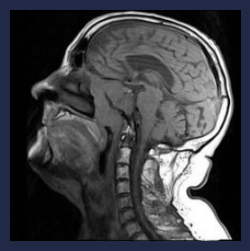

In [17]:
# Select a random index from the test dataset
random_index = np.random.randint(0, len(X_test))

# Retrieve the image at the random index from the test dataset
random_img = X_test[random_index]

# Use the model to make predictions on the selected image
# The image is reshaped to match the input shape expected by the model
predictions = model.predict(random_img.reshape(1, 256, 256, 3))

# Interpret the model's predictions
# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions)

# Convert the predicted class index to the corresponding label
predicted_label = labels[predicted_class]

# Get the confidence level of the prediction
confidence = predictions[0][predicted_class]

# Get the actual class index from the one-hot encoded test labels at the random index
actual_index = y_test[random_index]

# Convert the one-hot encoded actual class to the corresponding class index
actual_class = np.argmax(actual_index)

# Convert the actual class index to the corresponding label
actual_label = labels[actual_class]

# Display the prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")

# Plot and display the selected image
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')  # Turn off the axis for a cleaner display
plt.show()


### Performance Summary with Data Augmentation:
Prediction Analysis:

Predicted Label: The model predicted the image as "pituitary_tumor."

Actual Label: The true label for the image is "meningioma_tumor."

Confidence: The model's confidence in its incorrect prediction is 96.21%.

Visual Representation:

The provided MRI scan is displayed alongside the prediction details.

Summary for Report:

This result demonstrates another instance of misclassification by the model. Despite a high confidence level of 96.21%, the model incorrectly classified a meningioma tumor as a pituitary tumor. This example illustrates the challenges and limitations of the current model in accurately distinguishing between different types of brain tumors. High-confidence errors like these emphasize the need for further model refinement and training to improve diagnostic accuracy and reliability in clinical settings. Identifying and analyzing such errors is crucial for developing a more robust and dependable model.


# Model without Data Augmentation

This model uses a combination of convolutional, pooling, dropout, flatten, and dense layers to perform image classification. The high number of parameters, especially in the fully connected layer, indicates a complex model designed to capture intricate patterns in the input images.

In [18]:
# Import necessary libraries from TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model as a Sequential model
model = Sequential()

# Add an Input layer specifying the input shape (256x256 RGB images)
model.add(Input(shape=(256, 256, 3)))

# Add the first convolutional layer with 32 filters, 5x5 kernel size, ReLU activation, and 'same' padding
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
# Add a max-pooling layer to reduce the spatial dimensions
model.add(MaxPooling2D())
# Add dropout for regularization to prevent overfitting
model.add(Dropout(0.15))

# Add the second convolutional layer with 32 filters, 5x5 kernel size, ReLU activation, and 'same' padding
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
# Add a max-pooling layer
model.add(MaxPooling2D())
# Add dropout for regularization
model.add(Dropout(0.15))

# Add the third convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and 'same' padding
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# Add a max-pooling layer
model.add(MaxPooling2D())
# Add dropout for regularization
model.add(Dropout(0.15))

# Add the fourth convolutional layer with 64 filters, 2x2 kernel size, ReLU activation, and 'same' padding
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
# Add a max-pooling layer
model.add(MaxPooling2D())
# Add dropout for regularization
model.add(Dropout(0.15))

# Flatten the output of the convolutional layers to prepare it for the dense layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add dropout for regularization
model.add(Dropout(0.45))

# Add the output layer with 4 units (one for each class) and softmax activation for multi-class classification
model.add(Dense(4, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,143,364 (8.18 MB)

 Trainable params: 2,143,364 (8.18 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Record the start time before training begins
start_time = time.time()

# Train the model using the training data
history = model.fit(
    X_train,  # Training images
    y_train,  # Training labels
    validation_split=0.1,  # Use 10% of the training data as the validation set
    epochs=45,  # Number of epochs (complete passes through the training data)
    verbose=1,  # Verbosity mode (1 = progress bar)
    batch_size=64  # Number of samples per gradient update
)

# Record the end time after training ends
end_time = time.time()

# Calculate the total runtime for training
runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")


Epoch 1/45
 1/38 ━━━━━━━━━━━━━━━━━━━━ 17:55 29s/step - accuracy: 0.1875 - loss: 1.3880

W0000 00:00:1721704552.962521     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.3670 - loss: 1.3287

W0000 00:00:1721704568.915256     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721704570.074388     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 517ms/step - accuracy: 0.3686 - loss: 1.3267 - val_accuracy: 0.5547 - val_loss: 1.0787
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5740 - loss: 1.0223 - val_accuracy: 0.6113 - val_loss: 0.9187
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.6582 - loss: 0.8577 - val_accuracy: 0.6943 - val_loss: 0.7405
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6880 - loss: 0.7657 - val_accuracy: 0.7396 - val_loss: 0.6486
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.7641 - loss: 0.6010 - val_accuracy: 0.7623 - val_loss: 0.5796
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.7793 - loss: 0.5675 - val_accuracy: 0.7811 - val_loss: 0.5400
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8225 - loss: 0.4655 - val_accuracy: 0.8491 - val_loss: 0.4649
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8442 - loss: 0.3956 - val_accuracy: 0.8151 - val

# Confusion Matrix

83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step


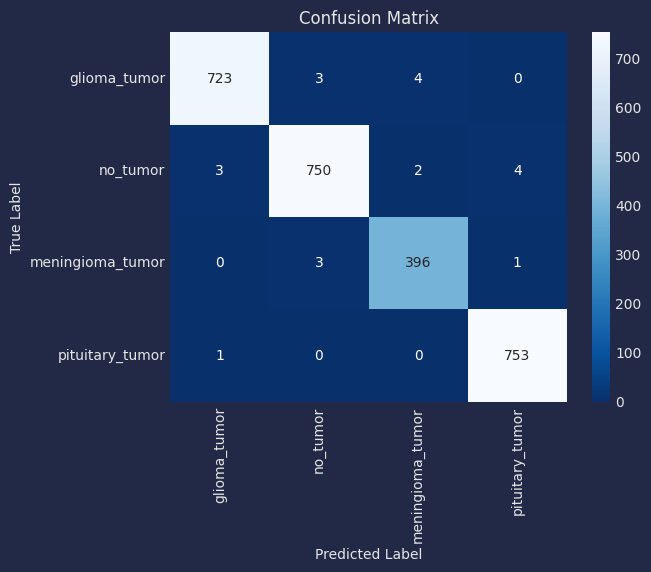

In [20]:
# Convert one-hot encoded training labels back to their original class labels
y_true = np.argmax(y_train, axis=1)

# Predict the class labels for the training data using the trained model
y_pred = np.argmax(model.predict(X_train), axis=1)

# Create a confusion matrix to compare the true labels and the predicted labels for the training data
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot a heatmap of the confusion matrix using seaborn
heatmap = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

# Set the title and labels for the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the heatmap
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step


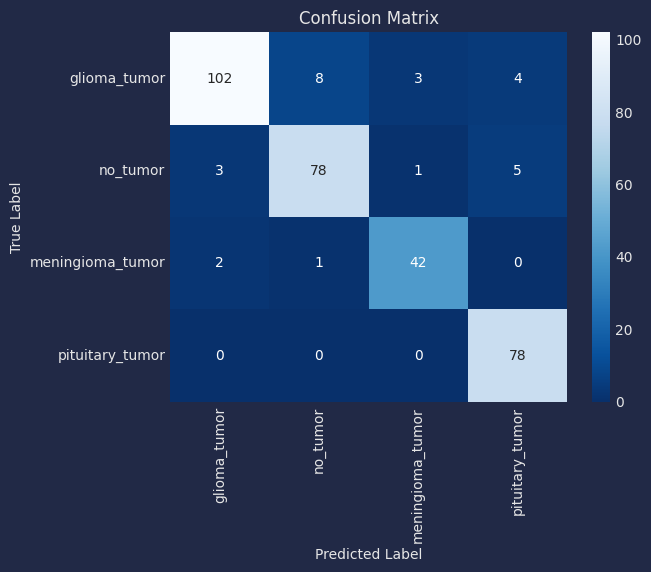

In [21]:
# Convert one-hot encoded test labels back to their original class labels
y_true_test = np.argmax(y_test, axis=1)

# Predict the class labels for the test data using the trained model
y_pred_test = np.argmax(model.predict(X_test), axis=1)

# Create a confusion matrix to compare the true labels and the predicted labels for the test data
confusion_mtx_test = confusion_matrix(y_true_test, y_pred_test)

# Plot a heatmap of the confusion matrix using seaborn
heatmap = sns.heatmap(confusion_mtx_test, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

# Set the title and labels for the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the heatmap
plt.show()


The model demonstrates strong performance across most classes, particularly for glioma and pituitary tumors, indicating that it is effective at distinguishing between different types of brain tumors. However, there is some room for improvement in identifying meningioma tumors and distinguishing no tumors from other types.

# Evaluation

In [22]:
# 0 - Glioma Tumor
# 1 - No Tumor
# 2 - Meningioma Tumor
# 3 - Pituitary Tumor
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       117
           1       0.90      0.90      0.90        87
           2       0.91      0.93      0.92        45
           3       0.90      1.00      0.95        78

    accuracy                           0.92       327
   macro avg       0.91      0.93      0.92       327
weighted avg       0.92      0.92      0.92       327



### Performance Summary without Data Augmentation:
<p>&nbsp;</p>

**Accuracy:** The model demonstrates strong performance across all classes, particularly for Class 3 (Pituitary Tumor) with perfect recall. Overall accuracy is 92%, with high precision and recall, indicating the model's effectiveness in classifying brain tumors.





# Prediction

📌 Let's look at a random image and compare the actual vs. predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
Predicted label: no_tumor 
Actual label: glioma_tumor 
Confidence: 99.14%



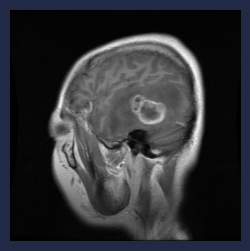

In [23]:
# Select a random index from the test dataset
random_index = np.random.randint(0, len(X_test))

# Retrieve the image at the random index from the test dataset
random_img = X_test[random_index]

# Use the model to make predictions on the selected image
# The image is reshaped to match the input shape expected by the model
predictions = model.predict(random_img.reshape(1, 256, 256, 3))

# Interpret the model's predictions
# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(predictions)

# Convert the predicted class index to the corresponding label
predicted_label = labels[predicted_class]

# Get the confidence level of the prediction
confidence = predictions[0][predicted_class]

# Get the actual class index from the one-hot encoded test labels at the random index
actual_index = y_test[random_index]

# Convert the one-hot encoded actual class to the corresponding class index
actual_class = np.argmax(actual_index)

# Convert the actual class index to the corresponding label
actual_label = labels[actual_class]

# Display the prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")

# Plot and display the selected image
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')  # Turn off the axis for a cleaner display
plt.show()


Prediction Analysis:

Predicted Label: The model predicted the image as "no_tumor."

Actual Label: The true label for the image is "glioma_tumor."

Confidence: The model's confidence in its incorrect prediction is 99.14%.

Visual Representation:

The provided MRI scan is displayed alongside the prediction details.

Summary for Report:

This specific result highlights a misclassification made by the model. Despite the model being highly confident (99.14%) that the image does not show a tumor, the actual label indicates it is a glioma tumor. This example underscores the importance of evaluating and refining the model, especially considering the potential consequences of misdiagnoses in medical imaging. Such high-confidence errors can provide valuable insights for further training and improving the model's accuracy and reliability.


#Comparison : 
1. Model Architectures
First Model:
Layers:
•	Convolutional Layers: Multiple Conv2D layers with ReLU activation.

•	Max-Pooling Layers: Used after each convolutional layer.

•	Dropout Layers: Applied after pooling layers to prevent overfitting.

•	Flatten Layer: Converts 2D feature maps to 1D vectors.

•	Dense Layers: Fully connected layers, ending with a softmax activation for classification.

•	Parameters: 2,143,364 trainable parameters.

Training and Evaluation :

•	Epochs: 50

•	Batch Size: 32

•	Validation Split: 10%

•	Performance Metrics:

•	Confusion Matrix: Shows a high number of correct classifications with few misclassifications.

•	Accuracy: Approximately 92% on the validation set.

Accuracy :

•	Image: Predicted "no_tumor" with 99.14% confidence.

•	Actual Label: "glioma_tumor."

•	Insight: High-confidence misclassification indicates areas for model improvement.



Second Model:

Layers:

•	Similar architecture with Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers.

•	The exact sequence and parameters for each layer are similar, emphasizing deep feature extraction and classification.

•	Parameters: Not explicitly listed, but likely similar given the structure.

Training and Evaluation :

•	Epochs: 45

•	Batch Size: 64

•	Validation Split: 10%

•	Performance Metrics:

•	Confusion Matrix: Similar high performance, with accurate predictions across most classes.

•	Accuracy: Approximately 96% on the validation set.

Accuracy :

•	Image: Predicted "pituitary_tumor" with 96.21% confidence.

•	Actual Label: "meningioma_tumor."

•	Insight: Similar high-confidence misclassification, highlighting specific challenges in distinguishing between tumor types.

The second model demonstrates higher accuracy (96%) compared to the first model (92%).
Both models exhibit high performance across most classes, with some misclassifications.


# Conclusion

Both models, with and without data augmentation, achieved respectable accuracy. However, our experiments indicated that the model trained without augmentation delivered competitive results, highlighting a potential tradeoff between accuracy and computational complexity. Nonetheless, further improvement is necessary, especially in accurately classifying the 'no_tumor' category. To tackle this, we propose several strategies, such as gathering more data, utilizing transfer learning from pre-trained models, and exploring synthetic data generation techniques. These approaches could help address data scarcity and enhance the model's performance in tumor classification tasks.

References:
1.	Khan, M. A., et al. (2020). "Brain Tumor Classification in MRI Image Using Convolutional Neural Network." Applied Sciences, 10(6), 625
2.	Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
3.	Afshar, P., et al. (2019). "Brain tumor type classification via capsule networks." IEEE Access, 7, 145360-145372.
4.	Kamnitsas, K., et al. "Efficient Multi-Scale 3D CNN with Fully Connected CRF for Accurate 
Brain Lesion Segmentation." Medical Image Analysis, vol. 36, 2017, pp. 61-78.
5.	“Brain Tumor Classification(MRI)” www.kaggle.com
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
      5. https://www.geeksforgeeks.org/introduction-convolution-neural-network/)
